In [104]:
import warnings
import json
from pandas.io.json import json_normalize

warnings.filterwarnings(action='ignore')
import numpy as np  # 수치계산, 배열 처리를 위해 import 한다.
import pandas as pd  # 데이터 분석을 위한 전처리를 위해 import 한다.
import matplotlib as mpl  # matplolib에서 음수 데이터의 '-'부호가 깨지는 것을 방지하기위해 import 한다.

mpl.rcParams['axes.unicode_minus'] = False  # matplolib에서 음수 데이터의 '-'부호가 깨지는 것을 방지한다.
import matplotlib.pyplot as plt  # 시각화를 하기 위해 import 한다.

plt.rcParams["font.size"] = 10  # matplolib에서 사용할 글꼴 크기 설정
plt.rcParams["font.family"] = "NanumGothicCoding"  # matplolib에서 사용할 글꼴 설정
import seaborn as sns  # 시각화를 하기 위해 import 한다. matplolib 기반으로 만든 시각화 도구

pd.options.display.float_format = '{:,.5f}'.format
from plotnine import *  # R의 ggplot2 패키지를 사용하는 것 처럼 사용하는 시각화 도구를 import 한다.
import missingno as msno  # 누락값의 분포를 그래프 형태로 보기위해 import 한다.
import folium  # 지도 시각화를 하기 위해 import 한다.
from wordcloud import WordCloud

In [105]:
rank = pd.read_csv('data/rank.csv')
rank

,userNum,nickname,gameId,seasonId,matchingMode,matchingTeamMode,characterNum,skinCode,characterLevel,gameRank,...,skillLevelInfo.1026310,skillLevelInfo.1006310,skillLevelInfo.1055430,skillLevelInfo.1012310,Unnamed: 0,skillLevelInfo.1026420,skillLevelInfo.1036410,eventMissionResult.162,skillLevelInfo.1040310,skillLevelInfo.1041210
0,725291,셀쓰녀가취향,22615555,15,3,3,39,1039001,18,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,725291,셀쓰녀가취향,22614952,15,3,3,39,1039001,16,2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,725291,셀쓰녀가취향,22614596,15,3,3,46,1046000,10,6,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,725291,셀쓰녀가취향,22613843,15,3,3,46,1046000,16,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1199780,탐피,22618328,15,3,3,2,1002002,15,2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19243,376780,Senzawa,22624651,15,3,3,17,1017000,16,2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19244,376780,Senzawa,22624511,15,3,3,17,1017000,16,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19245,376780,Senzawa,22624365,15,3,3,17,1017000,16,3,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
19246,376780,Senzawa,22618067,15,3,3,46,1046000,15,1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [106]:
characterNamesEn = pd.read_csv('data/characterList - origin.csv')  # 캐릭터 영문명
characterNamesKr = pd.read_csv('data/characterList - changed.csv')  # 캐릭터 한글명
skinNames = pd.read_csv('data/skin - changed.csv')  # 스킨
weaponNames = pd.read_csv('data/weapon - changed.csv')  # 무기
armorNames = pd.read_csv('data/armor - changed.csv')  # 방어구

characterNum: 캐릭터 코드

skinCode: 스킨 코드

mmrGain: 획득 MMR, escapeState: 탈출, gameRank: 등수,  playerKill: 킬수,  victory: 승리
damageToPlayer: 플레이어에게 준 데미지, damageToMonster: 야동에게 가한 데미지 => 지표 분석용

equipment.0 ~ equipment.5: 최종 착용 장비, equipFirstItemForLog.0 ~ equipFirstItemForLog.6: 최초 착용 장비 => 메타 분석용



In [107]:
# 캐릭터 62개 각각 아래자료 뽑아야함

code1 = pd.DataFrame()
Jakie = pd.concat([code1, rank[rank.characterNum == 1]], ignore_index=True)

# 가장 많이 사용한 스킨, 사용 횟수
print(
    f'"mostSkin" : "{skinNames[skinNames.code == int(Jakie.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" :  {Jakie.skinCode.value_counts().head(1).values[0]}')

'''지표 분석용'''
# 평균 플레이어 킬수
print(f'"averageKillPlayer" : {Jakie.playerKill.mean():.2f}')
# 평균 플레이어 데미지
print(f'"averageDamegeToPlayer" : {Jakie.damageToPlayer.mean():.2f}')
# 평균 야동 킬수
print(f'"averageKillMonster" : {Jakie.monsterKill.mean():.2f}')
# 평균 야동 데미지
print(f'"averageDamegeToMonster" : {Jakie.damageToMonster.mean():.2f}')
# 게임 플레이 수
print(f'"totalGames" : {Jakie.count()[0]}')
# 평균 승률
print(f'"winRate" : {661 / Jakie[Jakie.victory == 1].victory.count():.2f}')
# 평균 등수
print(f'"averageRank" : {Jakie[Jakie.escapeState != 3].gameRank.mean():.2f}')
# 탈출 횟수
print(f'"escapeCount" : {Jakie[Jakie.escapeState == 3].escapeState.count()}')
# 평균 mmr 획득률
print(f'"averageMMR" : {Jakie.mmrGain.mean():.2f}')

'''메타 분석용'''
# 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
print(
    f'"winWeapon" : "{weaponNames[weaponNames.code == int(Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).values[0]}')
print(
    f'"winBody" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).values[0]}')
print(
    f'"winHead" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).values[0]}')
print(
    f'"winArm" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).values[0]}')
print(
    f'"winFoot" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).values[0]}')
print(
    f'"winTinkled" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).values[0]}')

# 가장 많이 선택한 루트 아이템, 사용 횟수
print(
    f'"routeWeapon" : "{weaponNames[weaponNames.code == int(Jakie["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {Jakie["equipFirstItemForLog.0"].value_counts().head(1)[0]}')
print(
    f'"routeBody" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {Jakie["equipFirstItemForLog.1"].value_counts().head(1)[0]}')
print(
    f'"routeHead" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {Jakie["equipFirstItemForLog.2"].value_counts().head(1)[0]}')
print(
    f'"routeArm" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {Jakie["equipFirstItemForLog.3"].value_counts().head(1)[0]}')
print(
    f'"routeFoot" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.4"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeFootCount" : {Jakie["equipFirstItemForLog.4"].value_counts().head(1)[0]}')
# print(f'"routeTinkled" : "{armorNames[armorNames.code==int(Jakie["equipFirstItemForLog.5"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeTinkledCount" : "{Jakie["equipFirstItemForLog.5"].value_counts().head(1)[0]}"')
print(f'"routeTinkled" : "", "routeTinkledCount" : ""')

"mostSkin" : "시스템쇼크 재키", "mostSkinCount" :  195
"averageKillPlayer" : 2.96
"averageDamegeToPlayer" : 8293.12
"averageKillMonster" : 29.51
"averageDamegeToMonster" : 38051.72
"totalGames" : 661
"winRate" : 3.84
"averageRank" : 2.96
"escapeCount" : 49
"averageMMR" : 10.142
"winWeapon" : "프라가라흐", "winWeaponCount" : 54
"winBody" : "버건디47", "winBodyCount" : 54
"winHead" : "빛의증표", "winHeadCount" : 82
"winArm" : "레이더", "winArmCount" : 45
"winFoot" : "알렉산드로스", "winFootCount" : 59
"winTinkled" : "운명의주사위", "winTinkledCount" : 38
"routeWeapon" : "디오스쿠로이", "routeWeaponCount" : 173
"routeBody" : "집사복", "routeBodyCount" : 212
"routeHead" : "수정티아라", "routeHeadCount" : 340
"routeArm" : "바이탈센서", "routeArmCount" : 437
"routeFoot" : "경량화부츠", "routeFootCount" : 297
"routeTinkled" : "", "routeTinkledCount" : ""


In [108]:
print(
    f'{"{"}"character" : "{characterNamesKr.name[0]}", '
    f'"mostSkin" : "{skinNames[skinNames.code == int(Jakie.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" : {Jakie.skinCode.value_counts().head(1).values[0]}, '
    # 평균 플레이어 킬수
    f'"averageKillPlayer" : {Jakie.playerKill.mean():.2f}, '
    # 평균 플레이어 데미지
    f'"averageDamegeToPlayer" : {Jakie.damageToPlayer.mean():.2f}, '
    # 평균 야동 킬수
    f'"averageKillMonster" : {Jakie.monsterKill.mean():.2f}, '
    # 평균 야동 데미지
    f'"averageDamegeToMonster" : {Jakie.damageToMonster.mean():.2f}, '
    # 게임 플레이 수
    f'"totalGames" : {Jakie.count()[0]}, '
    # 평균 승률
    f'"winRate" : {661 / Jakie[Jakie.victory == 1].victory.count():.2f}, '
    # 평균 등수
    f'"averageRank" : {Jakie[Jakie.escapeState != 3].gameRank.mean():.2f}, '
    # 탈출 횟수
    f'"escapeCount" : {Jakie[Jakie.escapeState == 3].escapeState.count()}, '
    # 평균 mmr 획득률
    f'"averageMMR" : {Jakie.mmrGain.mean():.2f}, '
    # 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
    f'"winWeapon" : "{weaponNames[weaponNames.code == int(Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).values[0]}, '
    f'"winBody" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).values[0]}, '
    f'"winHead" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).values[0]}, '
    f'"winArm" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).values[0]}, '
    f'"winFoot" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).values[0]}, '
    f'"winTinkled" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).values[0]}, '
    # 가장 많이 선택한 루트 아이템, 사용 횟수
    f'"routeWeapon" : "{weaponNames[weaponNames.code == int(Jakie["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {Jakie["equipFirstItemForLog.0"].value_counts().head(1)[0]}, '
    f'"routeBody" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {Jakie["equipFirstItemForLog.1"].value_counts().head(1)[0]}, '
    f'"routeHead" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {Jakie["equipFirstItemForLog.2"].value_counts().head(1)[0]}, '
    f'"routeArm" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {Jakie["equipFirstItemForLog.3"].value_counts().head(1)[0]}, '
    f'"routeFoot" : "{armorNames[armorNames.code == int(Jakie["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "routeFootCount" : {Jakie["equipment.5"].value_counts().head(1).values[0]}, '
    f'"routeTinkled" : "", "routeTinkledCount" : ""{"}"}')

{"character" : "재키", "mostSkin" : "시스템쇼크 재키", "mostSkinCount" : 195, "averageKillPlayer" : 2.96, "averageDamegeToPlayer" : 8293.12, "averageKillMonster" : 29.51, "averageDamegeToMonster" : 38051.72, "totalGames" : 661, "winRate" : 3.84, "averageRank" : 2.96, "escapeCount" : 49, "averageMMR" : 10.142, "winWeapon" : "프라가라흐", "winWeaponCount" : 54, "winBody" : "버건디47", "winBodyCount" : 54, "winHead" : "빛의증표", "winHeadCount" : 82, "winArm" : "레이더", "winArmCount" : 45, "winFoot" : "알렉산드로스", "winFootCount" : 59, "winTinkled" : "운명의주사위", "winTinkledCount" : 38, "routeWeapon" : "디오스쿠로이", "routeWeaponCount" : 173, "routeBody" : "집사복", "routeBodyCount" : 212, "routeHead" : "수정티아라", "routeHeadCount" : 340, "routeArm" : "바이탈센서", "routeArmCount" : 437, "routeFoot" : "궁기병의화살통", "routeFootCount" : 145, "routeTinkled" : "", "routeTinkledCount" : ""}


In [222]:
code1 = pd.DataFrame()
Jakie = pd.concat([code1, rank[rank.characterNum == 1]], ignore_index=True)
characterStats = pd.DataFrame()
# 가장 많이 사용한 스킨, 사용 횟수
stat = (
    f'{"{"}"characterName" : "{characterNamesKr.name[0]}", '
    f'"characterCode" : "{characterNamesKr.code[0]}", '
    f'"mostSkin" : "{skinNames[skinNames.code == int(Jakie.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" : {Jakie.skinCode.value_counts().head(1).values[0]}, '
    # 평균 플레이어 킬수
    f'"averageKillPlayer" : {Jakie.playerKill.mean():.2f}, '
    # 평균 플레이어 데미지
    f'"averageDamegeToPlayer" : {Jakie.damageToPlayer.mean():.2f}, '
    # 평균 야동 킬수
    f'"averageKillMonster" : {Jakie.monsterKill.mean():.2f}, '
    # 평균 야동 데미지
    f'"averageDamegeToMonster" : {Jakie.damageToMonster.mean():.2f}, '
    # 게임 플레이 수
    f'"totalGames" : {Jakie.count()[0]}, '
    # 평균 승률
    f'"winRate" : {661 / Jakie[Jakie.victory == 1].victory.count():.2f}, '
    # 평균 등수
    f'"averageRank" : {Jakie[Jakie.escapeState != 3].gameRank.mean():.2f}, '
    # 탈출 횟수
    f'"escapeCount" : {Jakie[Jakie.escapeState == 3].escapeState.count()}, '
    # 평균 mmr 획득률
    f'"averageMMR" : {Jakie.mmrGain.mean():.2f}, '

    # 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
    f'"winWeapon" : "{weaponNames[weaponNames.code == int(Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {Jakie[Jakie.victory == 1]["equipment.0"].value_counts().head(1).values[0]}, '
    f'"winBody" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {Jakie[Jakie.victory == 1]["equipment.1"].value_counts().head(1).values[0]}, '
    f'"winHead" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {Jakie[Jakie.victory == 1]["equipment.2"].value_counts().head(1).values[0]}, '
    f'"winArm" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {Jakie[Jakie.victory == 1]["equipment.3"].value_counts().head(1).values[0]}, '
    f'"winFoot" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {Jakie[Jakie.victory == 1]["equipment.4"].value_counts().head(1).values[0]}, '
    f'"winTinkled" : "{armorNames[armorNames.code == int(Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {Jakie[Jakie.victory == 1]["equipment.5"].value_counts().head(1).values[0]}, '
    # 가장 많이 선택한 루트 아이템, 사용 횟수
    f'"routeWeapon" : "{weaponNames[weaponNames.code == int(Jakie["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {Jakie["equipFirstItemForLog.0"].value_counts().head(1)[0]}, '
    f'"routeBody" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {Jakie["equipFirstItemForLog.1"].value_counts().head(1)[0]}, '
    f'"routeHead" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {Jakie["equipFirstItemForLog.2"].value_counts().head(1)[0]}, '
    f'"routeArm" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {Jakie["equipFirstItemForLog.3"].value_counts().head(1)[0]}, '
    f'"routeFoot" : "{armorNames[armorNames.code == int(Jakie["equipFirstItemForLog.4"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeFootCount" : {Jakie["equipFirstItemForLog.4"].value_counts().head(1)[0]}, '
    f'"routeTinkled" : "", "routeTinkledCount" : ""{"}"}')
characterStats = pd.concat([characterStats,json_normalize(json.loads(stat))])
characterStats

,characterName,characterCode,mostSkin,mostSkinCount,averageKillPlayer,averageDamegeToPlayer,averageKillMonster,averageDamegeToMonster,totalGames,winRate,...,routeBody,routeBodyCount,routeHead,routeHeadCount,routeArm,routeArmCount,routeFoot,routeFootCount,routeTinkled,routeTinkledCount
0,재키,1,시스템쇼크 재키,195,2.96000,"8,293.12000",29.51000,"38,051.72000",661,3.84000,...,집사복,212,수정티아라,340,바이탈센서,437,경량화부츠,297,,


In [363]:
code1xy = pd.DataFrame()
xy = pd.concat([code1xy, json_normalize(json.loads(f'{"{"}"characterCode" : {characterNamesKr[characterNamesKr.code==int(characterStats.characterCode[0])].code[0]} ,"characterName" : "{characterNamesKr[characterNamesKr.code==int(characterStats.characterCode[0])].name[0]}" ,"pickRate" : {characterStats.totalGames[0]/19248*100:.2f}, "mmrGain" : {characterStats.averageMMR[0]:.2f}{"}"}'))])
xy

,characterCode,characterName,pickRate,mmrGain
0,1,재키,3.43000,10.14000


In [200]:
mmr=f'{rank.mmrGain.mean():.2f}'
# pickRate =   # 픽률
print(mmr)

9.93


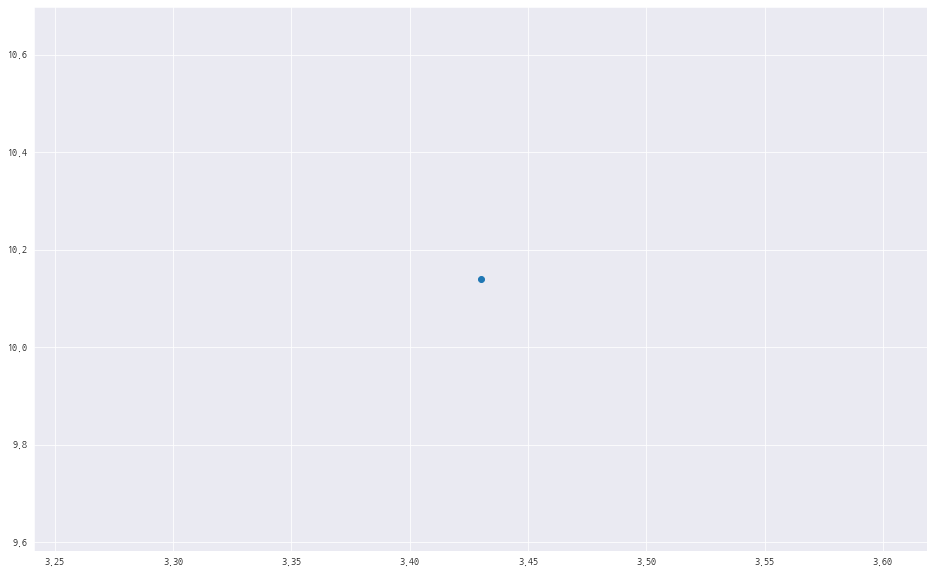

In [219]:
plt.figure(figsize=(16,10))
plt.plot(xy.pickRate, xy.mmrGain, 'o')
plt.show()

In [48]:
# 62개 캐릭터의 핵심 정보(인덱스, 승률 수정 필요)

df_code = pd.DataFrame()
df_test = pd.DataFrame()

for i in range(1, 63):
    character = pd.concat([df_code, rank[rank.characterNum == i]])

    stat = (
        # 가장 많이 사용한 스킨, 사용 횟수
        f'{"{"}"mostSkin" : "{skinNames[skinNames.code == int(character.skinCode.value_counts().head(1).index[0])].values[0][0]}", "mostSkinCount" : {character.skinCode.value_counts().head(1).values[0]}, '
        # 평균 플레이어 킬수
        f'"averageKillPlayer" : {character.playerKill.mean():.2f}, '
        # 평균 플레이어 데미지
        f'"averageDamegeToPlayer" : {character.damageToPlayer.mean():.2f}, '
        # 평균 야생동물 킬수
        f'"averageKillMonster" : {character.monsterKill.mean():.2f}, '
        # 평균 야생동물 데미지
        f'"averageDamegeToMonster" : {character.damageToMonster.mean():.2f}, '
        # 게임 플레이 횟수
        f'"totalGames" : {character.victory.count()}, '
        # 평균 승률 → 수정 필요?
        f'"winRate" : {661 / character[character.victory == 1].victory.count():.2f}, '
        # 평균 등수
        f'"averageRank" : {character[character.escapeState != 3].gameRank.mean():.2f}, '
        # 탈출 횟수
        f'"escapeCount" : {character[character.escapeState == 3].escapeState.count()}, '
        # 평균 mmr 획득률
        f'"averageMMR" : {character.mmrGain.mean():.3f}, '

        # 승리했던 경기에서 가장 많이 사용한 최종 아이템, 사용 횟수
        f'"winWeapon" : "{weaponNames[weaponNames.code == int(character[character.victory == 1]["equipment.0"].value_counts().head(1).index[0])].values[0][1]}", "winWeaponCount" : {character[character.victory == 1]["equipment.0"].value_counts().head(1).values[0]}, '
        f'"winBody" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.1"].value_counts().head(1).index[0])].values[0][1]}", "winBodyCount" : {character[character.victory == 1]["equipment.1"].value_counts().head(1).values[0]}, '
        f'"winHead" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.2"].value_counts().head(1).index[0])].values[0][1]}", "winHeadCount" : {character[character.victory == 1]["equipment.2"].value_counts().head(1).values[0]}, '
        f'"winArm" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.3"].value_counts().head(1).index[0])].values[0][1]}", "winArmCount" : {character[character.victory == 1]["equipment.3"].value_counts().head(1).values[0]}, '
        f'"winFoot" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.4"].value_counts().head(1).index[0])].values[0][1]}", "winFootCount" : {character[character.victory == 1]["equipment.4"].value_counts().head(1).values[0]}, '
        f'"winTinkled" : "{armorNames[armorNames.code == int(character[character.victory == 1]["equipment.5"].value_counts().head(1).index[0])].values[0][1]}", "winTinkledCount" : {character[character.victory == 1]["equipment.5"].value_counts().head(1).values[0]}, '
        # 가장 많이 선택한 루트 아이템, 사용 횟수
        f'"routeWeapon" : "{weaponNames[weaponNames.code == int(character["equipFirstItemForLog.0"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeWeaponCount" : {character["equipFirstItemForLog.0"].value_counts().head(1)[0]}, '
        f'"routeBody" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.1"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeBodyCount" : {character["equipFirstItemForLog.1"].value_counts().head(1)[0]}, '
        f'"routeHead" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.2"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeHeadCount" : {character["equipFirstItemForLog.2"].value_counts().head(1)[0]}, '
        f'"routeArm" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.3"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeArmCount" : {character["equipFirstItemForLog.3"].value_counts().head(1)[0]}, '
        f'"routeFoot" : "{armorNames[armorNames.code == int(character["equipFirstItemForLog.4"].value_counts().head(1).index[0][1:-1])].values[0][1]}", "routeFootCount" : {character["equipFirstItemForLog.4"].value_counts().head(1)[0]}, '
        f'"routeTinkled" : "", "routeTinkledCount" : ""{"}"}')
    df_test = pd.concat([df_test,json_normalize(json.loads(stat))])
    del character, stat

In [49]:
df_test

,mostSkin,mostSkinCount,averageKillPlayer,averageDamegeToPlayer,averageKillMonster,averageDamegeToMonster,totalGames,winRate,averageRank,escapeCount,...,routeBody,routeBodyCount,routeHead,routeHeadCount,routeArm,routeArmCount,routeFoot,routeFootCount,routeTinkled,routeTinkledCount
0,시스템쇼크 재키,195,2.96000,"8,293.12000",29.51000,"38,051.72000",661,3.84000,2.96000,49,...,집사복,212,수정티아라,340,바이탈센서,437,경량화부츠,297,,
0,불꽃놀이 아야,636,2.60000,"10,819.39000",22.83000,"27,965.12000",942,3.84000,3.20000,75,...,지휘관의갑옷,571,황실부르고넷,505,틴달로스의팔찌,517,타키온브레이스,520,,
0,파티드레스 피오라,186,2.06000,"7,800.92000",21.98000,"27,325.81000",291,10.33000,2.96000,19,...,EOD수트,119,제국왕관,214,틴달로스의팔찌,101,타키온브레이스,78,,
0,남국 매그너스,149,2.03000,"7,564.10000",15.11000,"18,663.17000",313,11.02000,3.26000,18,...,아마조네스아머,135,제국왕관,251,드라우프니르,206,EOD부츠,199,,
0,사신 자히르,24,2.71000,"10,583.76000",20.39000,"26,796.66000",41,73.44000,3.03000,5,...,고위사제복,18,제국왕관,31,드라우프니르,26,풍화륜,24,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,암흑가 헤이즈,224,2.46000,"11,080.11000",18.20000,"21,879.78000",386,9.44000,3.37000,31,...,지휘관의갑옷,266,황실부르고넷,295,틴달로스의팔찌,256,아이젠,242,,
0,암흑가 아이작,309,2.43000,"7,372.01000",18.62000,"21,601.14000",512,6.01000,3.12000,28,...,EOD수트,354,전술OPS헬멧,397,샤자한의검집,378,경량화부츠,281,,
0,타지아,39,3.33000,"9,196.26000",13.47000,"16,505.85000",66,36.72000,3.09000,1,...,고위사제복,57,제국왕관,60,아이기스,44,SCV,41,,
0,눈싸움 이렘,107,2.15000,"7,031.30000",15.59000,"18,930.38000",138,22.03000,3.39000,11,...,EOD수트,96,제국왕관,124,스포츠시계,80,타키온브레이스,56,,
